In [1]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from extraction import *
from extraction_scripts import *
from standard_reducer import *
from science_reducer import *

In [2]:
import glob

import astropy.io.fits as fits

biaspath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/bias/"

flatpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/flat/"

darkpath = "/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/dark/"

BIAS = []

FLAT = []


for filename in glob.glob(biaspath + '*.fits'):
    BIAS.append(fits.open(filename))

for filename in glob.glob(flatpath + '*.fits'):
    FLAT.append(fits.open(filename))


In [3]:
median_biasframe = cube_median(BIAS)

median_flatframe = cube_median(FLAT)

bias_subtracted_flat = bias_subtract(median_flatframe, median_biasframe)

image_mask = create_mask(bias_subtracted_flat, median_biasframe)

norm_flat = normalize_flat(bias_subtracted_flat, image_mask)

Enter Pixel Radius from Peak: 20


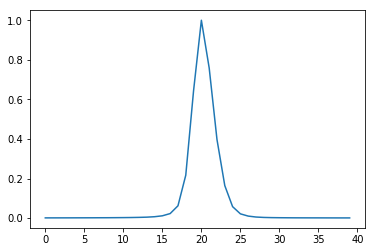

Enter Background Threshold: 0.1


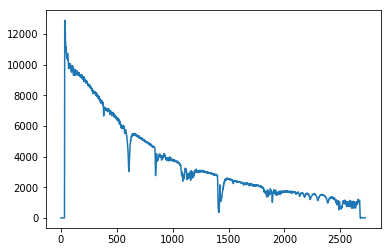

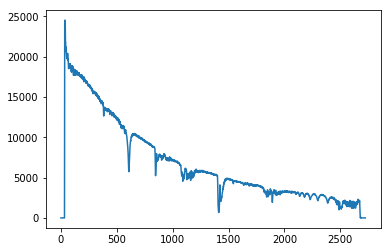

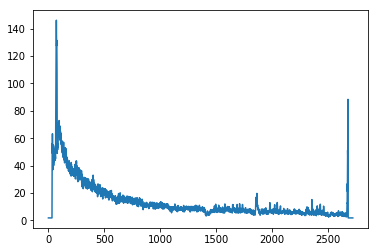

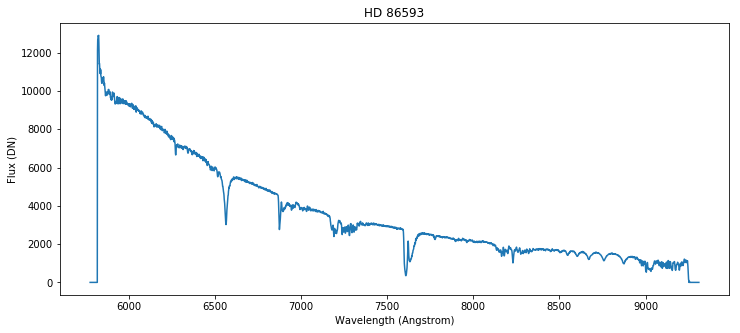

In [4]:
tpath = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/telluric/r1080.fits'
outpath = '/home/ryan/projects/data_prods/1077/'
objname = 'HD 86593'
standard_reducer(tpath, outpath, objname, median_biasframe, norm_flat, image_mask)

tpath0 = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/telluric/r1080.fits'

tfile0 = fits.open(tpath0)

tslcs0, tvarslcs0, tpolymod0, tprof0 = reduce_standard_first_stage(tfile0, median_biasframe, norm_flat, image_mask, 20)

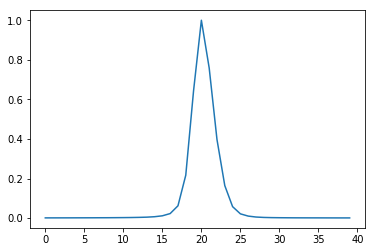

In [5]:
plt.plot(tprof0)
plt.show()

In [6]:
tspec0, tvar0, tback0 = reduce_second_stage(tslcs0, tvarslcs0, tprof0, 0.1)

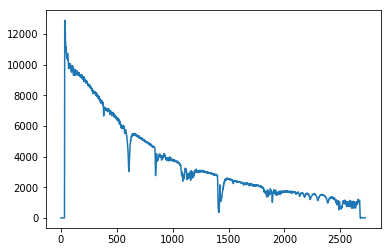

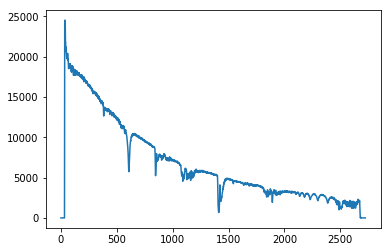

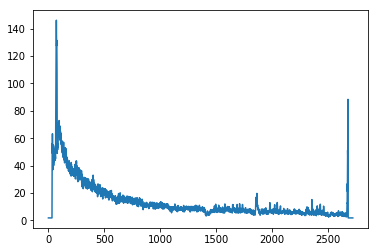

In [7]:
plt.plot(tspec0)
plt.show()

plt.plot(tvar0)
plt.show()

plt.plot(tback0)
plt.show()

In [8]:
wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')

wavecal = np.poly1d(wavemod)

In [18]:
outputpath = '/home/ryan/projects/data_prods/'

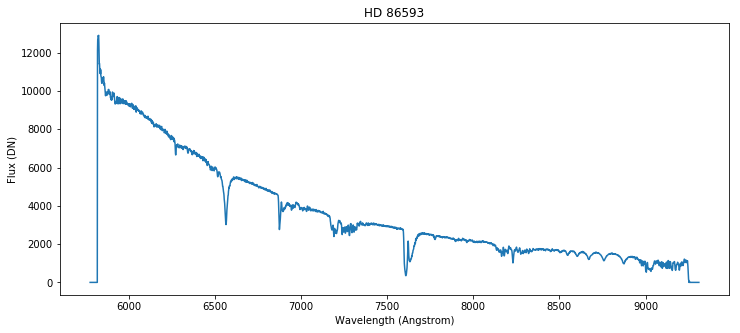

In [20]:
pxrange = range(len(tspec0))

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), tspec0)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (DN)')
plt.title('HD 86593')

plt.savefig(outputpath + 'HD 86593.pdf', type='pdf')

plt.show()

In [21]:
import pandas as pd

PX = pxrange

WAVELENGTH = wavecal(pxrange)

FLUX = tspec0

STDEV = np.sqrt(tvar0)

BKG = tback0

tuples = list(zip(PX, WAVELENGTH, FLUX, STDEV, BKG))

head = ['PX', 'WAVELENGTH', 'FLUX', 'STDEV', 'BKG']


tdf = pd.DataFrame(data=tuples, columns=head)

tdf.to_csv(outputpath + "HD86593.csv", index=False)


In [ ]:
tpath1 = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/telluric/r1081.fits'

tfile0 = fits.open(tpath0)

tslcs0, tvarslcs0, tpolymod0, tpolyfit0, tprof0 = reduce_standard_first_stage(tfile0, median_biasframe, norm_flat, image_mask, 20)